In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/ariyantsarkar/loan-data/Loan Automaion System DATA.csv
/kaggle/input/loan-data/train.csv
/kaggle/input/loan-data/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv("/kaggle/input/d/ariyantsarkar/loan-data/Loan Automaion System DATA.csv")
df=data.copy()

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [10]:
df.drop("Loan_ID",axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [15]:
encoding=df.groupby("Gender")["Loan_Status"].mean().reset_index()
encoding

,Gender,Loan_Status
0,Female,0.669643
1,Male,0.691235


In [16]:
df=df.merge(encoding,how="left",on="Gender")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_x,Loan_Status_y
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,0.691235
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0.691235
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0.691235
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0.691235
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0.691235


# . Exploratory Data Analysis

In [17]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
data["Loan_Status"].value_counts().values

array([422, 192])

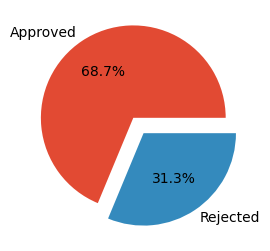

In [19]:
plt.figure(figsize=(4,3))
labels=["Approved","Rejected"]
explode=[.1,.1]
size=data["Loan_Status"].value_counts().values
plt.pie(size,explode,labels=labels,autopct="%1.1f%%")
plt.show()

In [20]:
data_num=data.select_dtypes(np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [21]:
data_num["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data_num["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

> Loan_Amount_Term and Credit_History both are categorial data

In [23]:
data_num.drop(["Credit_History","Loan_Amount_Term"],axis=1,inplace=True)

In [24]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [25]:
data_num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

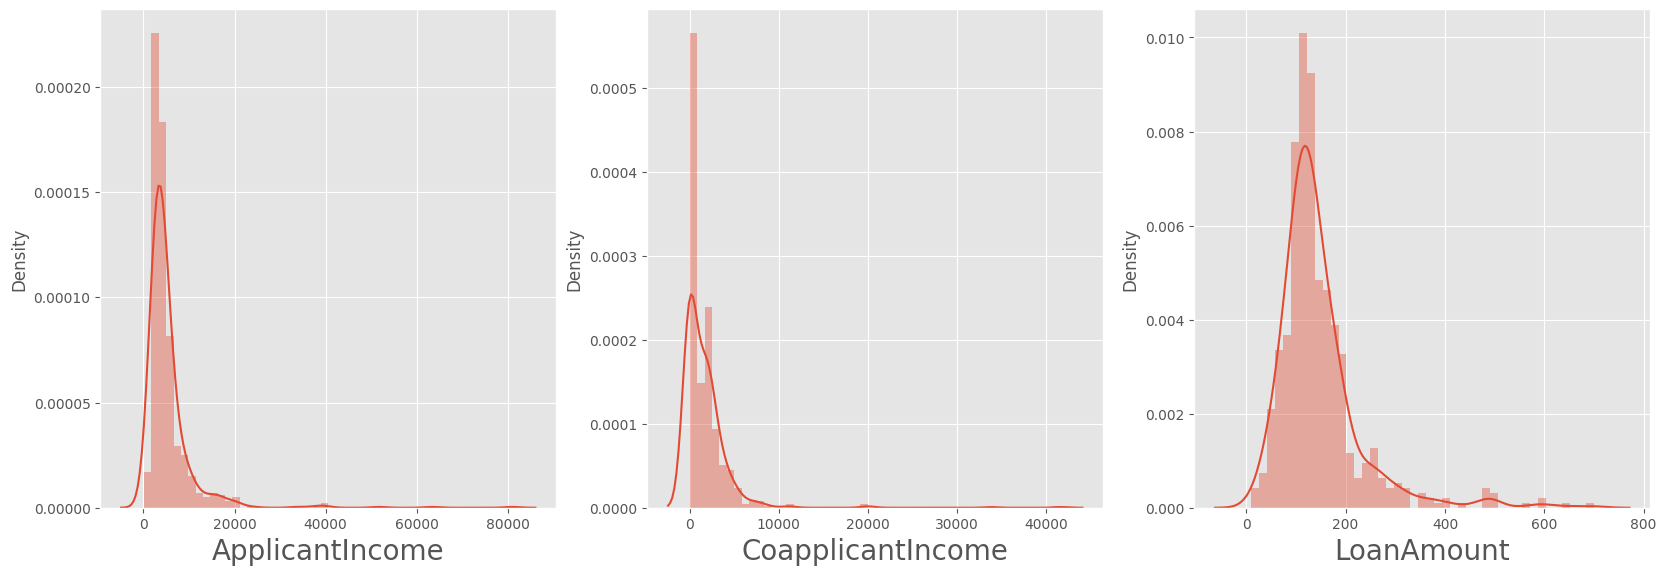

In [26]:
plt.figure(figsize=(20,22))
plotnumber = 1

for column in data_num:
    if plotnumber<=3 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# Outlier Detection

<Figure size 900x300 with 0 Axes>

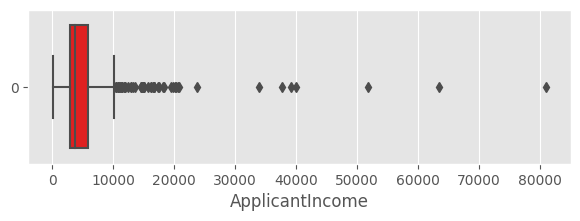

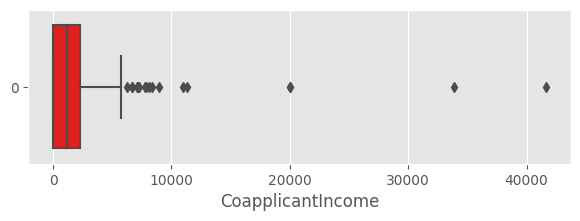

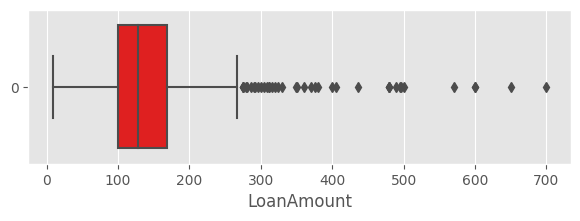

In [27]:
plt.figure(figsize=(9,3))
for column in data_num.columns:
    plt.figure(figsize=(7,2))
    ax=sns.boxplot(data[column],orient="h",color="red")
    ax.set_xlabel(column)
    plt.show()

**From the above charts we can observe that the features contains an outliers and we are getting skewed distribution as well so that's why we need to handle the outliers with IQR method.**

 # Plot the countplot to analyze the relation between dependent and independent variables

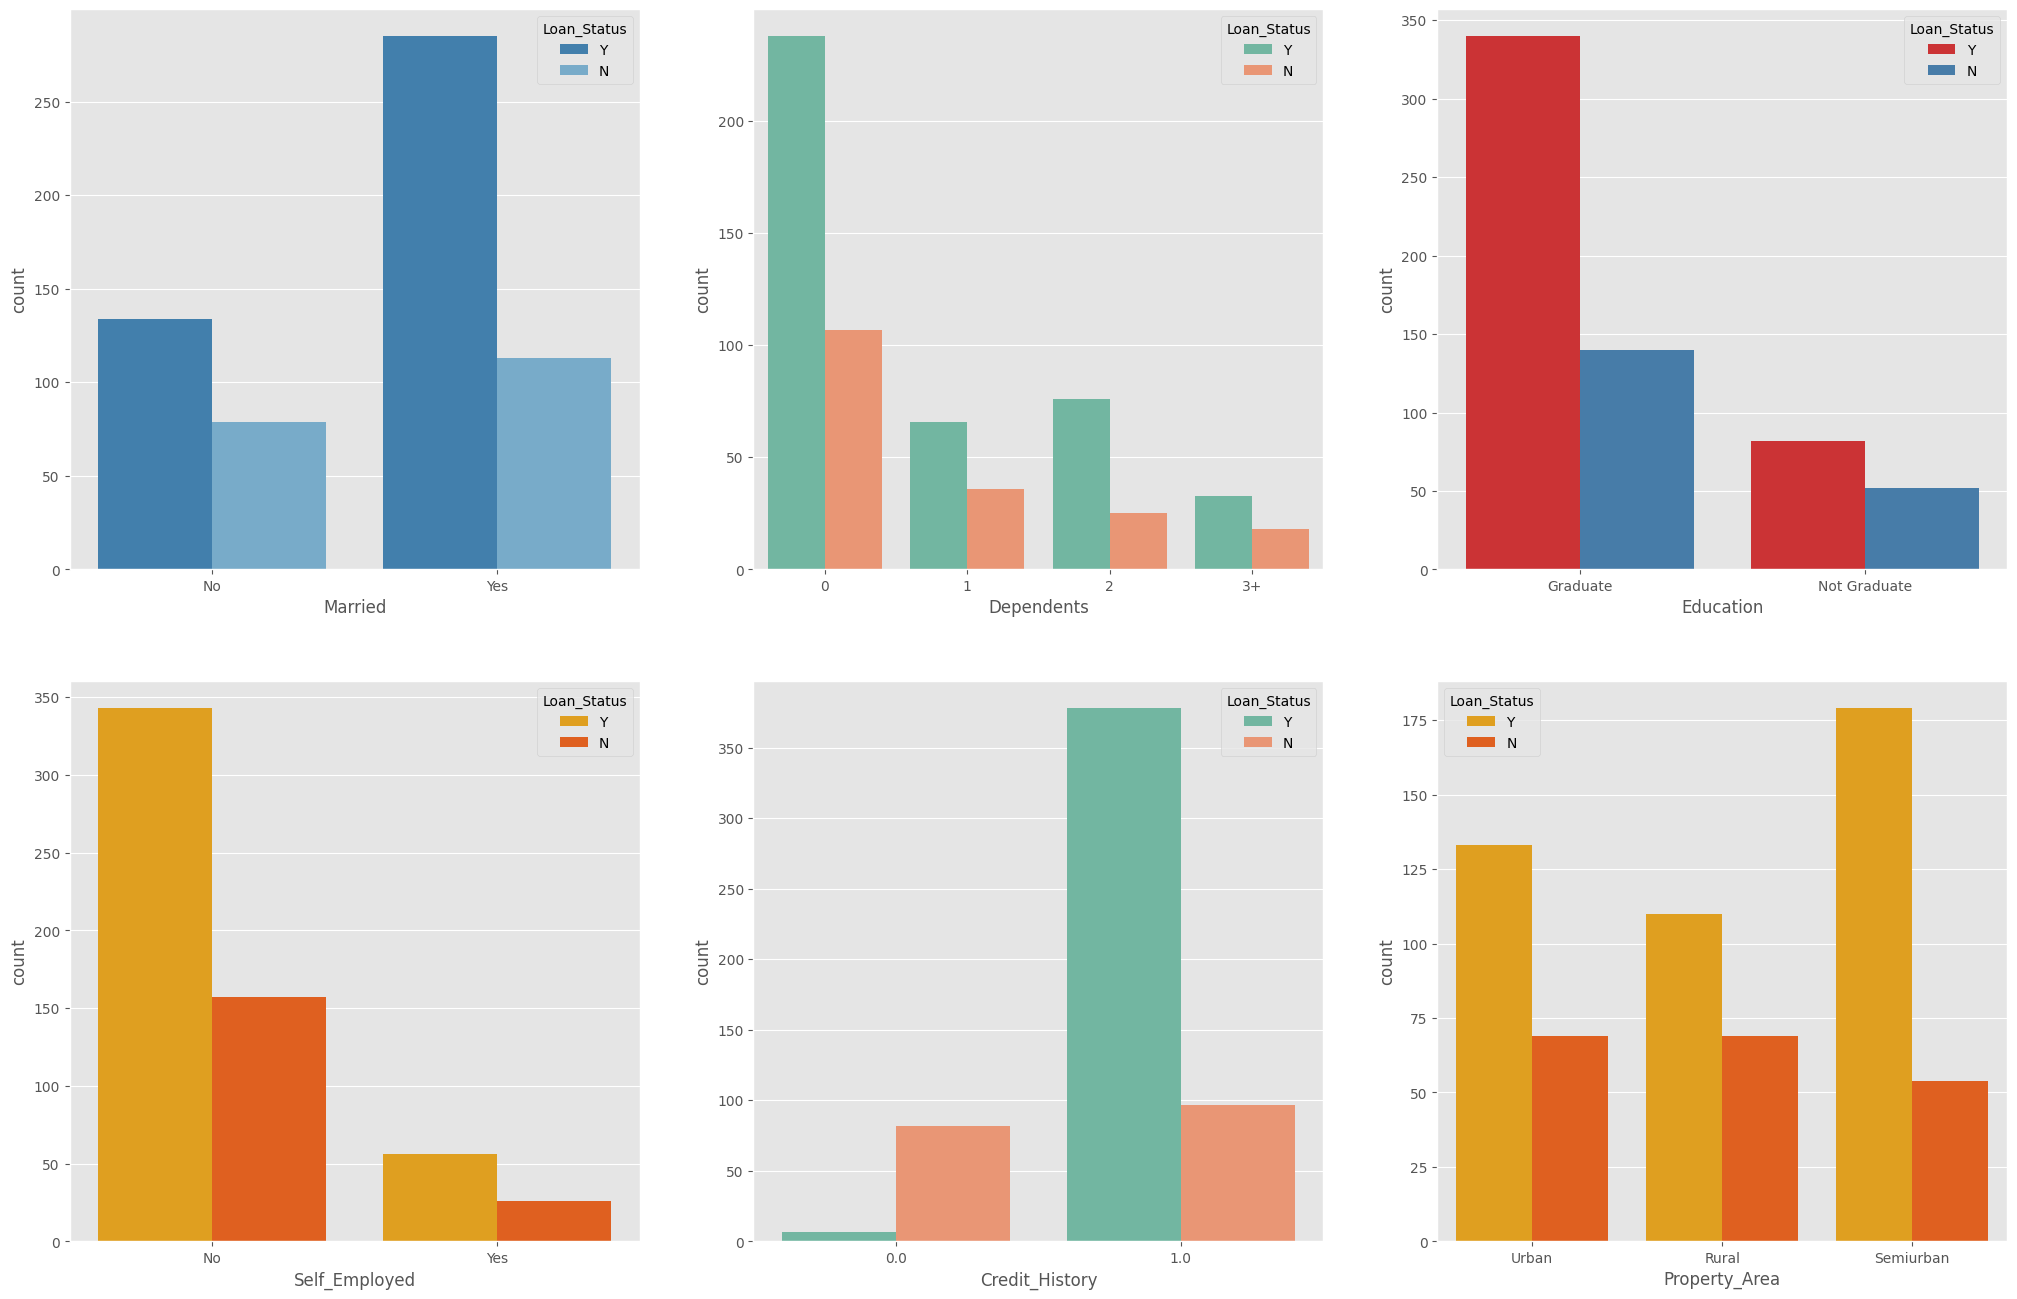

In [28]:
fig, ax = plt.subplots(2, 3, figsize = (25, 16))

sns.countplot(x = 'Married', hue = 'Loan_Status', data = data, palette = 'tab20c', ax = ax[0][0])
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = data, palette = 'Set2', ax = ax[0][1])

sns.countplot(x = 'Education', hue = 'Loan_Status', data = data, palette = 'Set1', ax = ax[0][2])

sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = data, palette = 'autumn_r', ax = ax[1][0])

sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = data, palette = 'Set2', ax = ax[1][1])

sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = data, palette = 'autumn_r', ax = ax[1][2])

plt.show()

**Customer having a bad credit history has a very low chance to get their loan application granted.**

# Handle Missing Values

In [29]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)

In [30]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handle Categorial Data

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
feature_cols=['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for x in feature_cols:
    data[x] = le.fit_transform(data[x])


In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [35]:
data.drop("Loan_ID",axis=1,inplace=True)

# Outlier Detection/Handling

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [37]:
Q1=data["ApplicantIncome"].quantile(0.25)
Q3=data["ApplicantIncome"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data = data[(data["ApplicantIncome"]>lower_limit)&(data["ApplicantIncome"]<upper_limit)]

In [38]:
Q1=data["CoapplicantIncome"].quantile(0.25)
Q3=data["CoapplicantIncome"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data = data[(data["CoapplicantIncome"]>lower_limit)&(data["CoapplicantIncome"]<upper_limit)]

In [39]:
Q1=data["LoanAmount"].quantile(0.25)
Q3=data["LoanAmount"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

data = data[(data["LoanAmount"]>lower_limit)&(data["LoanAmount"]<upper_limit)]

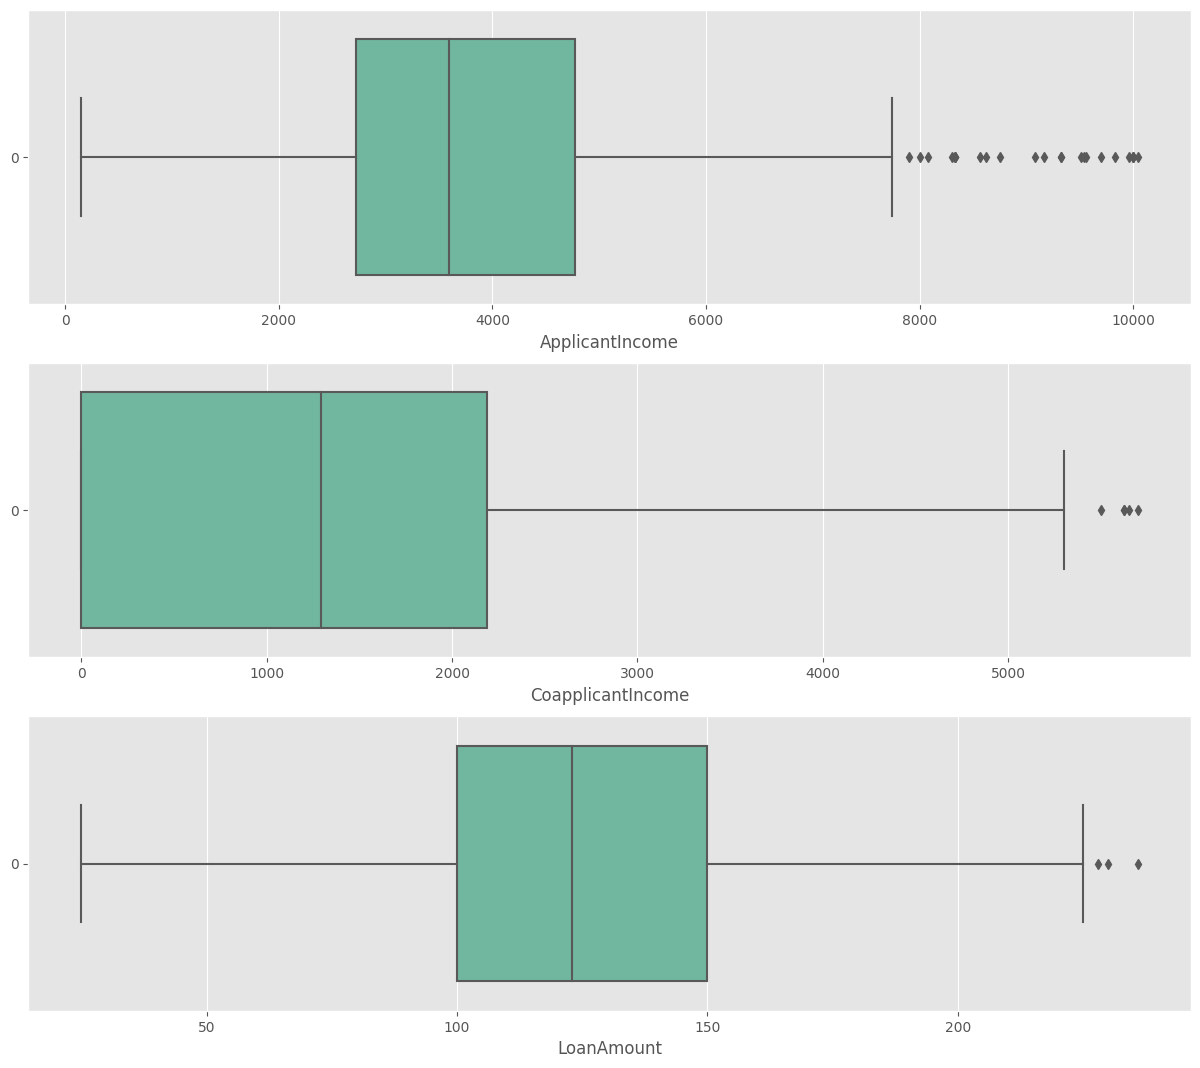

In [40]:
fig, axs = plt.subplots(3,1, figsize = (15, 13))
plt1 = sns.boxplot(data['ApplicantIncome'], ax = axs[0], palette = 'BuGn',orient="h")
axs[0].set_xlabel("ApplicantIncome")
plt1 = sns.boxplot(data['CoapplicantIncome'], ax = axs[1], palette = 'BuGn',orient="h")
axs[1].set_xlabel("CoapplicantIncome")
plt1 = sns.boxplot(data['LoanAmount'], ax = axs[2], palette = 'BuGn',orient="h")
axs[2].set_xlabel("LoanAmount")
plt.show()

# Feature Selection

<AxesSubplot: >

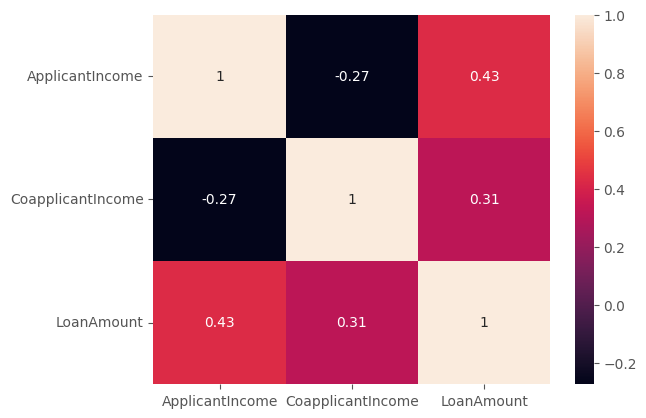

In [41]:
cor=data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].corr()
sns.heatmap(cor,annot=True)

In [42]:
from sklearn.feature_selection import chi2

In [43]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [44]:
df = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

In [45]:
x1=df.drop("Loan_Status",axis=1)
y1=df["Loan_Status"]

In [46]:
f_score=chi2(x1,y1)

In [47]:
f_score

(array([ 0.1997959 ,  1.16318823,  0.02853975,  5.36803727,  0.09226792,
         2.8698891 , 25.21033279,  0.50912984]),
 array([6.54885643e-01, 2.80805309e-01, 8.65846097e-01, 2.05090427e-02,
        7.61313525e-01, 9.02510884e-02, 5.14060438e-07, 4.75515783e-01]))

In [48]:
p_value=pd.Series(f_score[1],index=x1.columns).sort_values(ascending=True)
p_value

Credit_History      5.140604e-07
Education           2.050904e-02
Loan_Amount_Term    9.025109e-02
Married             2.808053e-01
Property_Area       4.755158e-01
Gender              6.548856e-01
Self_Employed       7.613135e-01
Dependents          8.658461e-01
dtype: float64

In [49]:
cols = []

for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

Credit_History  :- Reject Null Hypothesis
Education  :- Reject Null Hypothesis
Loan_Amount_Term  :- Accept Null Hypothesis
Married  :- Accept Null Hypothesis
Property_Area  :- Accept Null Hypothesis
Gender  :- Accept Null Hypothesis
Self_Employed  :- Accept Null Hypothesis
Dependents  :- Accept Null Hypothesis


In [50]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [51]:
data.drop(labels=cols,axis=1,inplace=True)

In [52]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


In [53]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]=scaler.fit_transform(data[["ApplicantIncome","CoapplicantIncome","LoanAmount"]])

In [54]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,1.102649,-0.590370,0.10,1.0,1
1,0,0.484560,0.097901,0.10,1.0,0
2,0,-0.288295,-0.590370,-1.14,1.0,1
3,1,-0.491883,0.485851,-0.06,1.0,1
4,0,1.176370,-0.590370,0.36,1.0,1


In [55]:
X=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [58]:
X_train.shape,y_train.shape

((416, 5), (416,))

In [59]:
X_test.shape,y_test.shape

((104, 5), (104,))

# Model Building

**1. Logistic Regression**

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Making Prediction with Logistic Regression Model
y_pred_lr = model.predict(X_test)

**2. Naive Bayes Classifier**

In [62]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# fit the model
clf.fit(X_train, y_train)

GaussianNB()

In [63]:
# making prediction with Naive Bayes
y_pred_nb = clf.predict(X_test)

**3. Support Vector Machine**

In [64]:
# Support Vector Machine
from sklearn import svm
classifier = svm.SVC(kernel = 'poly')

#fit the model
classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [65]:
# Make a prediction for the test set with SVM
y_pred_svm = classifier.predict(X_test)

# Model Evaluation

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

* **Accuracy Score**

In [67]:
print("Accuracy Score on test data using Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score on test data using Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Accuracy Score on test data using SVM:", accuracy_score(y_test, y_pred_svm))

Accuracy Score on test data using Logistic Regression: 0.8076923076923077
Accuracy Score on test data using Naive Bayes: 0.8076923076923077
Accuracy Score on test data using SVM: 0.8076923076923077


* **Precision Score:**

In [68]:
print('Precision Score:', precision_score(y_test, y_pred_lr))
print('Precision Score:', precision_score(y_test, y_pred_nb))
print('Precision Score:', precision_score(y_test, y_pred_svm))

Precision Score: 0.7976190476190477
Precision Score: 0.7976190476190477
Precision Score: 0.7976190476190477


* **recall-score**

In [69]:
print('Recall Score:', recall_score(y_test, y_pred_lr))
print('Recall Score:', recall_score(y_test, y_pred_nb))
print('Recall Score:', recall_score(y_test, y_pred_svm))

Recall Score: 0.9571428571428572
Recall Score: 0.9571428571428572
Recall Score: 0.9571428571428572


* **F1-score**

In [70]:
print('F1 Score:', f1_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_nb))
print('F1 Score:', f1_score(y_test, y_pred_svm))

F1 Score: 0.8701298701298702
F1 Score: 0.8701298701298702
F1 Score: 0.8701298701298702


# **classification report**

In [71]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63        34
           1       0.80      0.96      0.87        70

    accuracy                           0.81       104
   macro avg       0.82      0.73      0.75       104
weighted avg       0.81      0.81      0.79       104



# **confusion matrix**

<AxesSubplot: >

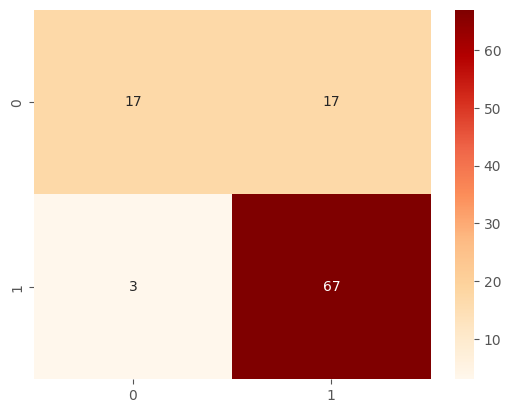

In [72]:
cm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,cmap = 'OrRd')

# Hyper Parameter Tunning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel': ['rbf','poly']}

In [75]:
grid= GridSearchCV(classifier,param_grid, verbose=3, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.795 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.831 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.702 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.702 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.699 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.699 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.702 total time=   0.0s
[CV 1/5] END ....C=0.1, gamm

GridSearchCV(estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [76]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [77]:
classifier_new = svm.SVC(kernel = 'rbf', C=1, gamma=0.1)

In [78]:
classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [79]:
classifier_new.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [80]:
# Make a prediction for the test set with SVM
y_pred_svm_new = classifier_new.predict(X_test)

In [81]:
print("Accuracy Score on test data using SVM:", accuracy_score(y_test, y_pred_svm_new))

Accuracy Score on test data using SVM: 0.8076923076923077


# Build the Predictive System

In [82]:
input_data = (0, 0.515229, 0.106444, 0.616667, 1)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

# scale the input data
#scaled_data = scaler.fit_transform(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)

if prediction[0] == 1:
    print("The application is approved")
else:
    print("The application is rejected")

The application is approved


In [83]:
# saving the model 
import pickle 
pickle_out = open("Automating_Loan_Prediction_System.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()